In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import shap

In [3]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\wine.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
x = df.drop(columns=['Customer_Segment'])
y = df['Customer_Segment']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ocsvm', OneClassSVM())
])

In [ ]:
param_dist = {
    'ocsvm__nu': [0.05, 0.1, 0.2],
    'ocsvm__gamma': ['auto', 'scale', 0.1, 0.5, 1],
    'ocsvm__degree' : [2,3],
    'ocsvm__coef0' : [-1,0,1],
    'ocsvm__kernel': ['linear','poly','rbf','sigmoid']
}

random_search = RandomizedSearchCV(pipeline,
param_distributions=param_dist,
scoring='accuracy',
cv=5,
n_jobs=-1
)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=OneClassSVM(), n_jobs=-1,
                   param_distributions={'coef0': [-1, 0, 1], 'degree': [2, 3],
                                        'gamma': ['auto', 'scale', 0.1, 0.5, 1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'nu': [0.05, 0.1, 0.2]},
                   scoring='accuracy')

In [ ]:
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print(y_pred)

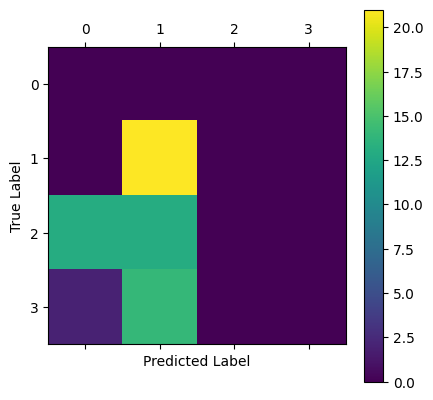

In [8]:
matrix = confusion_matrix(y_test, y_pred)

plt.matshow(matrix)
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Text(113.9222222222222, 0.5, 'true value')

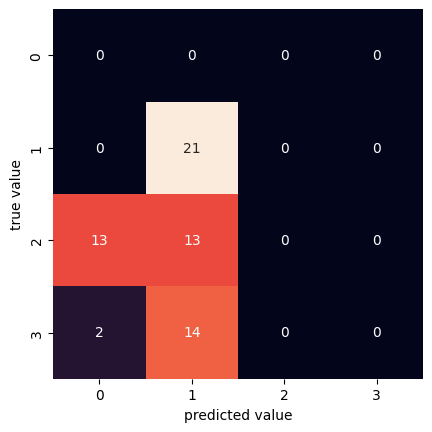

In [9]:
sns.heatmap(matrix, square  =True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.3333333333333333

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       0.44      1.00      0.61        21
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        16

    accuracy                           0.33        63
   macro avg       0.11      0.25      0.15        63
weighted avg       0.15      0.33      0.20        63



c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [11]:
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.47826087 0.17391304 0.39130435 0.39130435 0.2173913 ]
Mean CV Accuracy: 0.33043478260869563


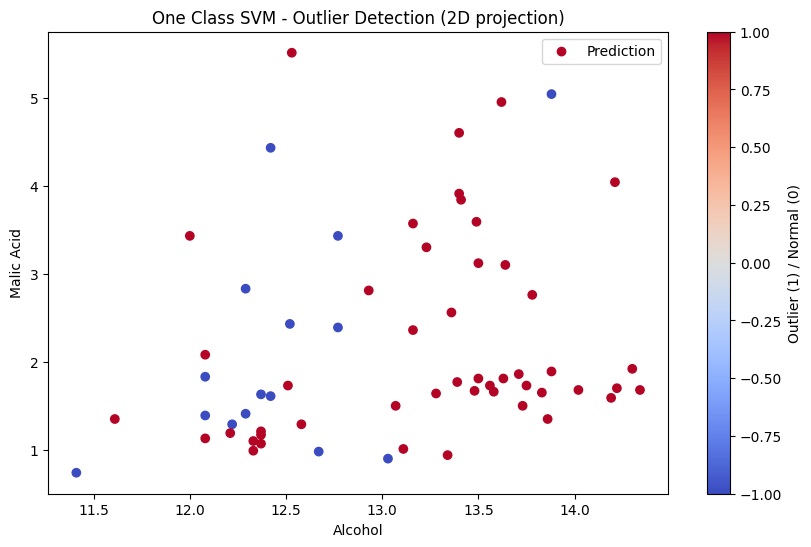

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_pred, cmap='coolwarm', label='Prediction')
plt.title("One Class SVM - Outlier Detection (2D projection)")
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.colorbar(label='Outlier (1) / Normal (0)')
plt.legend()
plt.show()

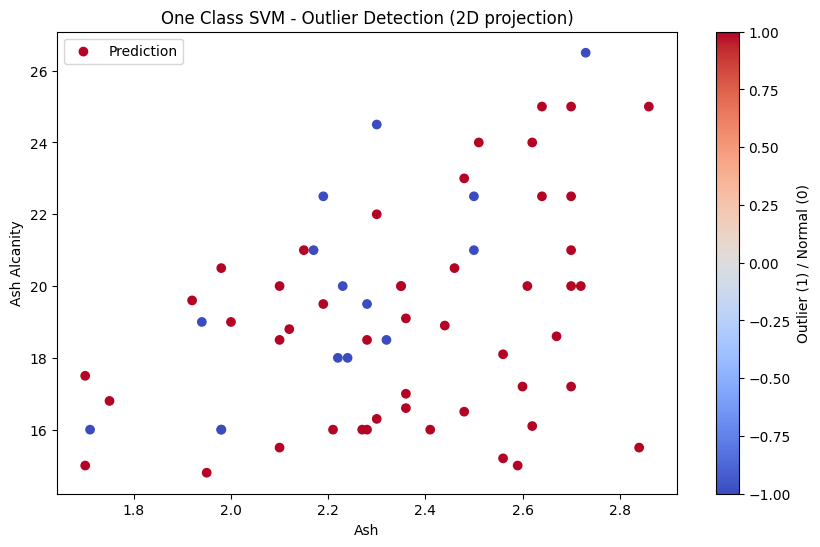

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test.iloc[:, 2], x_test.iloc[:, 3], c=y_pred, cmap='coolwarm', label='Prediction')
plt.title("One Class SVM - Outlier Detection (2D projection)")
plt.xlabel('Ash')
plt.ylabel('Ash Alcanity')
plt.colorbar(label='Outlier (1) / Normal (0)')
plt.legend()
plt.show()

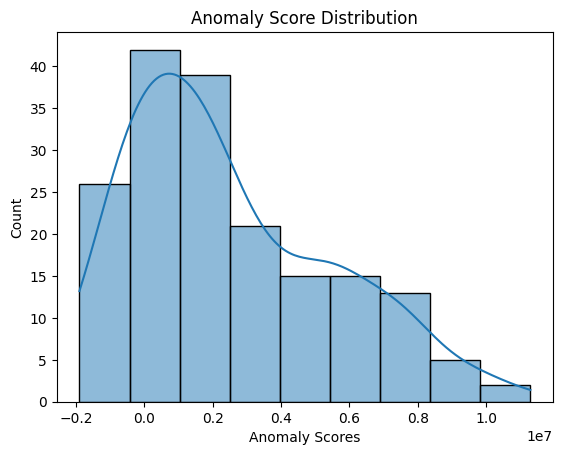

In [14]:
anomaly_scores = best_model.decision_function(x)
sns.histplot(anomaly_scores, kde=True)
plt.xlabel('Anomaly Scores')
plt.title('Anomaly Score Distribution')
plt.show()

In [ ]:
perm_importance = permutation_importance(best_model, x_test, y_test, scoring="neg_mean_squared_error")
feature_importance = perm_importance.importances_mean

feature_names = x_train.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=feature_names, orient="h", palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

In [ ]:
explainer = shap.Explainer(best_model.predict, x_train)
shap_values = explainer(x_test)

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=x_train.columns)
shap.plots.bar(shap_values)